<a href="https://colab.research.google.com/github/vitordanielp/analise_dados_pandas/blob/main/An%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# upload de arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# criando nosso Dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
df.shape

(904, 16)

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [22]:
# qual foi a receita total?
round(df['Valor Venda'].sum(), 2)

5984606.14

In [18]:
# coluna custo
df['custo'] = df['Custo Unitário'] * df['Quantidade']

In [ ]:
df.head(1)

In [21]:
# custo total
df['custo'].sum()

2486783.05

In [23]:
# lucro
df['lucro'] = df['Valor Venda'] - df['custo']

In [ ]:
df.sample(2)

In [28]:
round(df['lucro'].sum(), 2)

3497823.09

In [34]:
# extraindo tempo de envio
df['tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df.head(2)

In [43]:
# média tempo de envio por marca
df.groupby('Marca')['tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [45]:
# verificando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

In [52]:
# configuração de ponto flutuante pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [53]:
# lucro por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [55]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [58]:
# quantidade de procutos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

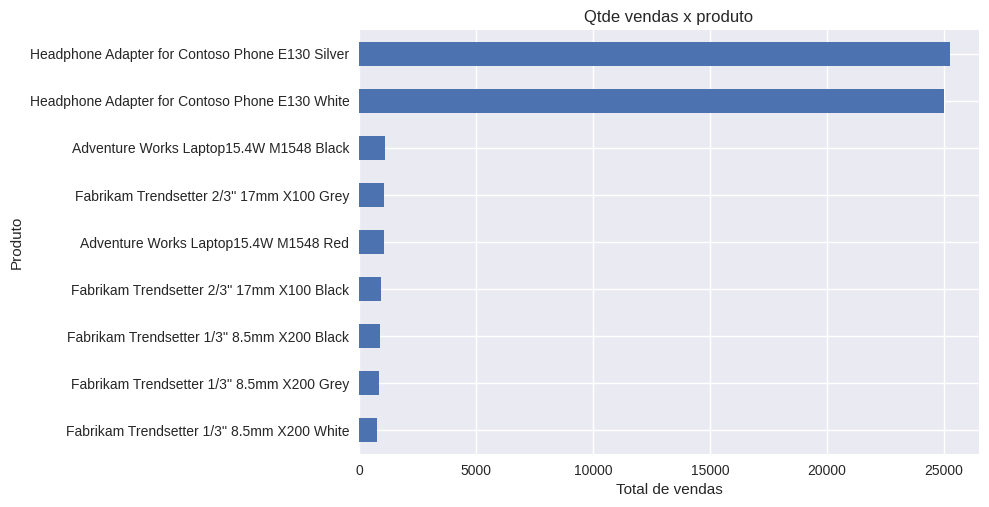

In [77]:
# quantidade de vendas por produto
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Qtde vendas x produto')
plt.xlabel('Total de vendas')
plt.ylabel('Produto');

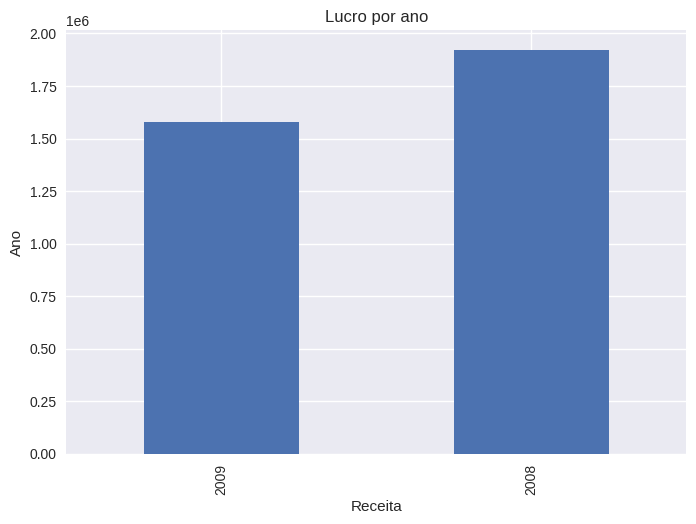

In [83]:
# lucro por ano
df.groupby(df['Data Venda'].dt.year)['lucro'].sum().sort_values(ascending=True).plot.bar(title='Lucro por ano')
plt.xlabel('Receita')
plt.ylabel('Ano');

In [84]:
df.groupby(df['Data Venda'].dt.year)['lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [85]:
# selecionando vendas 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [ ]:
df_2009.sample(5)

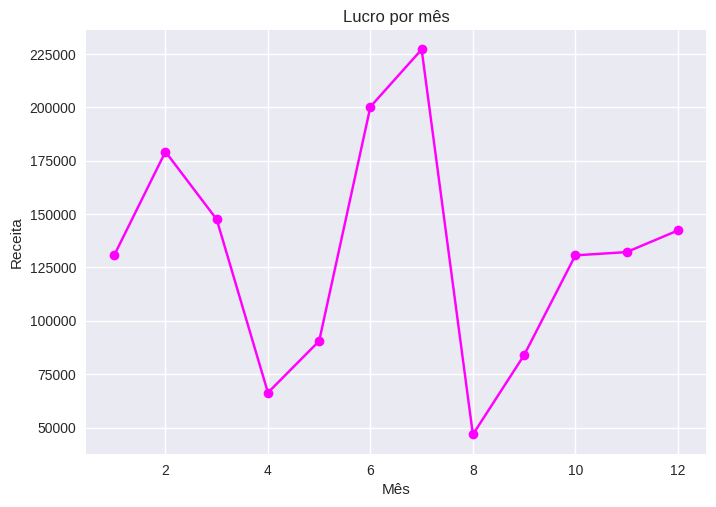

In [94]:
# lucro por mês
df_2009.groupby(df['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro por mês', marker='o', color='magenta')
plt.xlabel('Mês')
plt.ylabel('Receita');

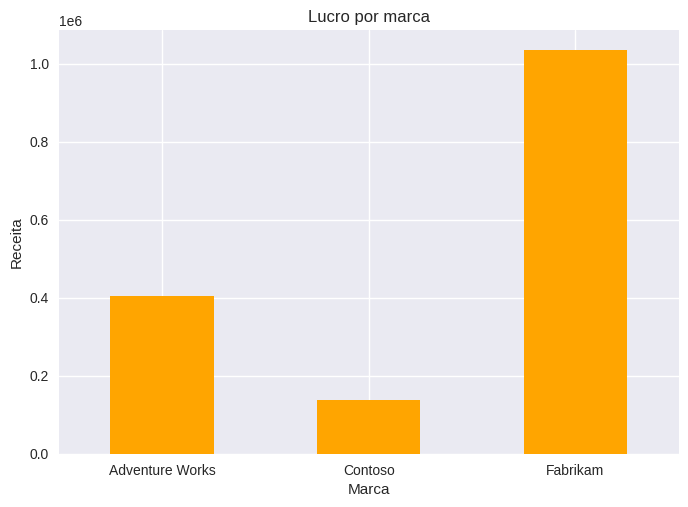

In [98]:
# lucro por marca
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title='Lucro por marca', color='orange')
plt.xlabel('Marca')
plt.ylabel('Receita')
plt.xticks(rotation='horizontal');

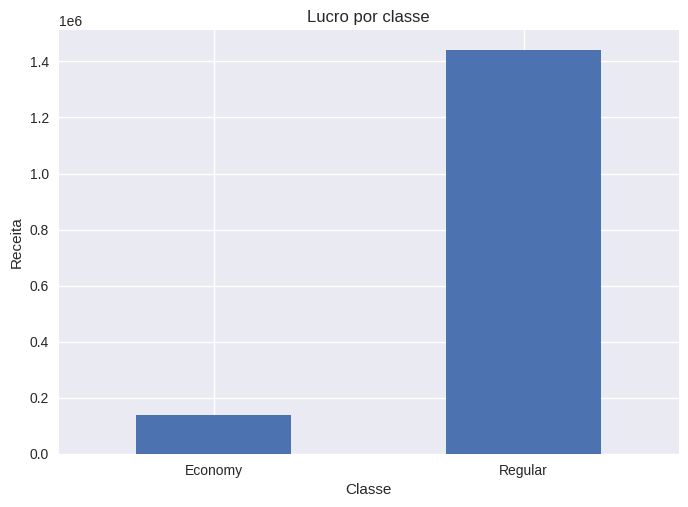

In [103]:
# lucro por classe
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title='Lucro por classe')
plt.xlabel('Classe')
plt.ylabel('Receita')
plt.xticks(rotation='horizontal');

In [106]:
df['tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

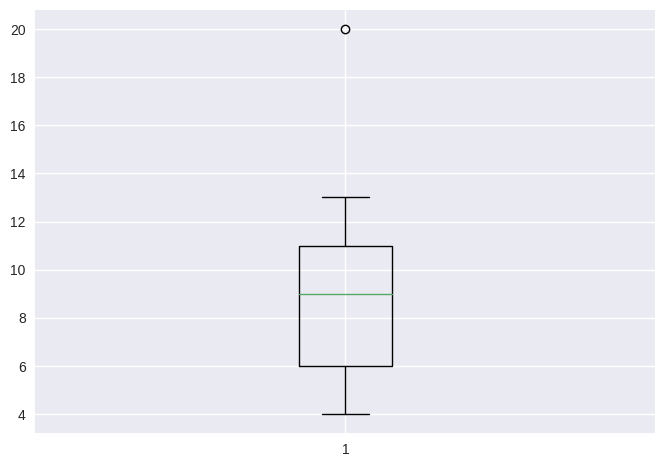

In [107]:
# Boxplot
plt.boxplot(df['tempo_envio']);

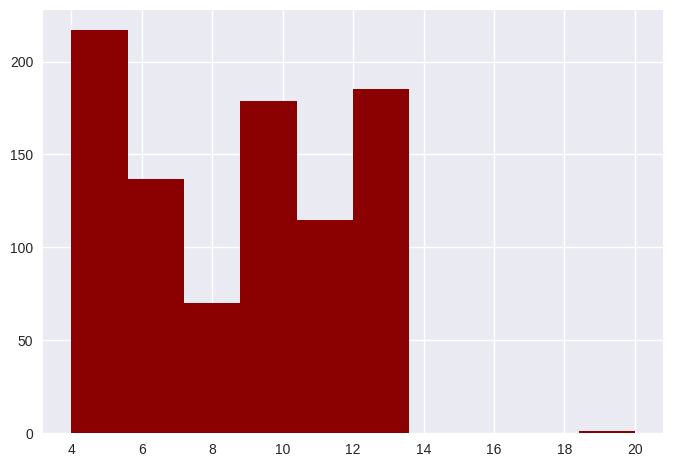

In [120]:
# Histograma
plt.hist(df['tempo_envio'], color='darkred');

In [121]:
# tempo mínimo de envio
df['tempo_envio'].min()

4

In [122]:
# tempo máximo de envio
df['tempo_envio'].max()

20

In [125]:
# visualização de outlier
df[df['tempo_envio'] == df['tempo_envio'].max()]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [126]:
df.to_csv('df_vendas_novo.csv', sep=';', index=False)